# Import Libraries

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# SQL
import sqlite3
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
#-----------------------------------------------------------
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


# Data Collection
Objectives: 
* Describing how data was collected (API, Web Scraping, etc.)
* Cleaning the requested data
* Converting the data into a Data Frame

In [2]:
data_train = pd.read_csv('test.csv')
data_test = pd.read_csv('train.csv')

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    
# Data Wrangling
Objectives:
* Filtering the Data
* Dealing with missing values
* Determine Training Labels
* Using One Hot Encoding to prepare the data to a binary classification
    
</div>


In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
nan_columns = data_train.columns[data_train.isnull().any()]
print("Number of Attributes containing NaN values: \n",len(nan_columns))
print("Columns with NaN values: \n", nan_columns.values)

Number of Attributes containing NaN values: 
 33
Columns with NaN values: 
 ['MSZoning' 'LotFrontage' 'Alley' 'Utilities' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'BsmtFullBath' 'BsmtHalfBath' 'KitchenQual' 'Functional'
 'FireplaceQu' 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageCars'
 'GarageArea' 'GarageQual' 'GarageCond' 'PoolQC' 'Fence' 'MiscFeature'
 'SaleType']


In [6]:
object_columns = data_train.select_dtypes(include=['object']).columns
print("Number of Attributes with data type 'object': \n",len(object_columns))
print("Columns with data type 'object': \n", object_columns.values)

Number of Attributes with data type 'object': 
 43
Columns with data type 'object': 
 ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">

<b>Infer<b>
* 80 attributes (homes features ) and 1459 entries (residential homes)
* 33 out of 80 attributes are contating NaN values (nan_columns).
* 43 out of 80 attributes have non-numeric values (object_columns).
* Attribute "Id" is the Key attribute. It uniquely identifies each entry (House).
</div>

<div style="background-color: lightgreen; padding: 12px; border-radius: 5px;">

<b>Next Step<b>

Dealing with missing values of the attributes having the numeric values.

</div>

In [7]:
numeric_nan_columns = list(set(nan_columns) - set(object_columns))
print(numeric_nan_columns,'\n')

['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'MasVnrArea', 'TotalBsmtSF', 'LotFrontage', 'BsmtFinSF2'] 



In [8]:
data_train[numeric_nan_columns]

,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,BsmtFinSF1,GarageCars,GarageArea,GarageYrBlt,MasVnrArea,TotalBsmtSF,LotFrontage,BsmtFinSF2
0,0.0,0.0,270.0,468.0,1.0,730.0,1961.0,0.0,882.0,80.0,144.0
1,0.0,0.0,406.0,923.0,1.0,312.0,1958.0,108.0,1329.0,81.0,0.0
2,0.0,0.0,137.0,791.0,2.0,482.0,1997.0,0.0,928.0,74.0,0.0
3,0.0,0.0,324.0,602.0,2.0,470.0,1998.0,20.0,926.0,78.0,0.0
4,0.0,0.0,1017.0,263.0,2.0,506.0,1992.0,0.0,1280.0,43.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,546.0,0.0,0.0,0.0,NaN,0.0,546.0,21.0,0.0
1455,0.0,0.0,294.0,252.0,1.0,286.0,1970.0,0.0,546.0,21.0,0.0
1456,1.0,0.0,0.0,1224.0,2.0,576.0,1960.0,0.0,1224.0,160.0,0.0
1457,0.0,1.0,575.0,337.0,0.0,0.0,NaN,0.0,912.0,62.0,0.0


## Dealing with 'BsmtHalfBath' attribute

In [9]:
# Finding the description of the attributes
def get_attribute_description(file_path, attribute_name):
    """
    This function reads a text file containing attributes and their descriptions, 
    stores them in a dictionary, and returns the description for a specific attribute.

    :param file_path: Path to the text file
    :param attribute_name: The name of the attribute to look up
    :return: The description of the specified attribute, or a message if not found
    """
    # Initialize an empty dictionary to hold the attributes and descriptions
    attributes_dict = {}

    # Open the text file
    with open(file_path, 'r') as file:
        current_attribute = None
        current_description = []
        
        for line in file:
            line = line.rstrip()  # Remove trailing whitespace
            if not line:
                continue  # Skip empty lines
            
            # Check if the line is a potential attribute name followed by a colon
            if ':' in line:
                if current_attribute:
                    # If there was a previous attribute, save it before moving to the next one
                    attributes_dict[current_attribute] = '\n'.join(current_description).strip()
                # Extract attribute name and start a new description
                current_attribute, description_part = line.split(':', 1)
                current_attribute = current_attribute.strip()
                current_description = [description_part.strip()]
            else:
                # If the line doesn't contain a colon, it's part of the current description
                current_description.append(line)
        
        # Don't forget to add the last attribute after exiting the loop
        if current_attribute:
            attributes_dict[current_attribute] = '\n'.join(current_description).strip()

    # Look up the requested attribute
    if attribute_name in attributes_dict:
        return f"{attribute_name}:\n{attributes_dict[attribute_name]}"
    else:
        return f"Attribute '{attribute_name}' not found."

In [10]:
# 'BsmtHalfBath' attribute description
print(get_attribute_description('data_description.txt', 'BsmtHalfBath'))

BsmtHalfBath:
Basement half bathrooms


In [11]:
data_train['BsmtHalfBath'].value_counts(dropna=False)

BsmtHalfBath
0.0    1364
1.0      91
NaN       2
2.0       2
Name: count, dtype: int64

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
Given that '0.0' is the most frequent value, it indicates a non-event and the missing data is a small percentage, simple imputation with the Most Frequent Value (Mode) is logical.

</div>

In [12]:
# Replacing the missing values with Mode
mode_value = data_train['BsmtHalfBath'].mode()[0]
data_train['BsmtHalfBath'].fillna(mode_value, inplace=True)

In [13]:
data_train['BsmtHalfBath'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: BsmtHalfBath
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [14]:
numeric_nan_columns.remove('BsmtHalfBath')

In [15]:
numeric_nan_columns

['BsmtFullBath',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'MasVnrArea',
 'TotalBsmtSF',
 'LotFrontage',
 'BsmtFinSF2']

## Dealing with 'BsmtFinSF1' attribute 

In [16]:
# 'BsmtFinSF1' attribute description
print(get_attribute_description('data_description.txt', 'BsmtFinSF1'))

BsmtFinSF1:
Type 1 finished square feet


In [17]:
data_train_BsmtFinSF1=data_train['BsmtFinSF1'].value_counts(dropna=False).reset_index()
data_train_BsmtFinSF1.sort_values('BsmtFinSF1')

,BsmtFinSF1,count
0,0.0,462
6,16.0,5
28,20.0,3
1,24.0,15
192,28.0,2
...,...,...
456,2158.0,1
654,2257.0,1
447,2288.0,1
365,4010.0,1


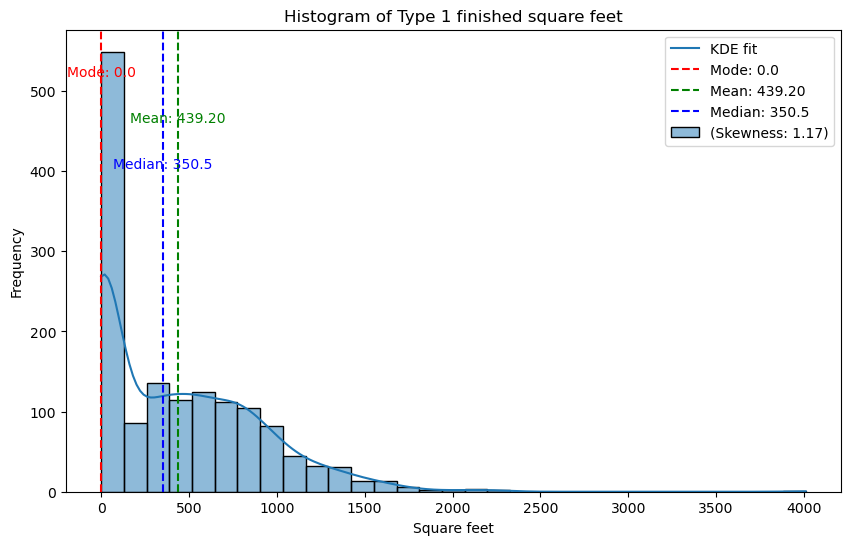

In [18]:
# defining a function to Calculate mode, mean, and median and plot the histogram
def analyze_column(dataframe, column_name, xlabel,title):
    # Calculate mode, mean, and median
    mode_value = dataframe[column_name].mode()[0]  # Mode can return multiple values; take the first
    mean_value = dataframe[column_name].mean()
    median_value = dataframe[column_name].median()
    skewness_value = dataframe[column_name].dropna().skew()  # Drop NaN values before calculating skewness

    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe[column_name], kde=True,label=f'(Skewness: {skewness_value:.2f})',line_kws={'label': "KDE fit"})
    
    # Plot vertical lines for mode, mean, and median
    plt.axvline(mode_value, color='red', linestyle='--', label=f'Mode: {mode_value}')
    plt.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='--', label=f'Median: {median_value}')
    
    # Annotate the values
    plt.text(mode_value, plt.ylim()[1] * 0.9, f'Mode: {mode_value}', color='red', ha='center')
    plt.text(mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='green', ha='center')
    plt.text(median_value, plt.ylim()[1] * 0.7, f'Median: {median_value}', color='blue', ha='center')    
    
    # Add labels and title
    plt.title(f'Histogram of {title}')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Show plot
    plt.show()

analyze_column(data_train, 'BsmtFinSF1', xlabel='Square feet',title= 'Type 1 finished square feet')

In [19]:
data_train['BsmtFinSF1'].dropna().describe()

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
Since the data is continuous and has a skewness value of 1.16567669422342, indicating a positive skew (right-skewed distribution), the data is not symmetrically distributed and has a longer tail on the right side. Therefore, it is generally more appropriate to impute missing values with the median rather than the mean.
</div>

In [20]:
# Replacing the missing values with Median
data_train['BsmtFinSF1'].fillna(data_train['BsmtFinSF1'].median(), inplace=True)

In [21]:
data_train['BsmtFinSF1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: BsmtFinSF1
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [22]:
numeric_nan_columns.remove('BsmtFinSF1')

In [23]:
numeric_nan_columns

['BsmtFullBath',
 'BsmtUnfSF',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'MasVnrArea',
 'TotalBsmtSF',
 'LotFrontage',
 'BsmtFinSF2']

## Dealing with 'GarageCars' attribute 	

In [24]:
# 'BsmtFinSF1' attribute description
print(get_attribute_description('data_description.txt', 'GarageCars'))

GarageCars:
Size of garage in car capacity


In [25]:
data_train_GarageCars=data_train['GarageCars'].value_counts(dropna=False).reset_index()
data_train_GarageCars.sort_values('GarageCars')

,GarageCars,count
3,0.0,76
1,1.0,407
0,2.0,770
2,3.0,193
4,4.0,11
5,5.0,1
6,NaN,1


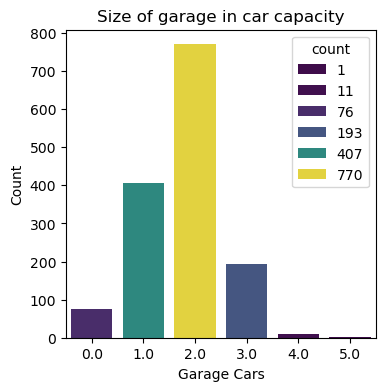

In [26]:
plt.figure(figsize=(4, 4))
sns.barplot(x='GarageCars', y='count',hue='count',data=data_train_GarageCars.dropna(), palette='viridis')
plt.xlabel("Garage Cars")
plt.ylabel("Count")
plt.title("Size of garage in car capacity")
plt.show()

In [27]:
data_train['GarageCars'].dropna().skew()

-0.10714151559186293

In [28]:
data_train['GarageCars'].dropna().mean()

1.7661179698216736

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
Since data is discrete and the skewness is very close to 0, suggesting that the distribution is nearly symmetrical, the Mode can be a choice for imputation. As it is a value that makes sense contextually and occurs most frequently.
</div>

In [29]:
# Calculate the mode
mode_value = data_train['GarageCars'].mode()[0]

# Impute the missing value with the mode
data_train['GarageCars'].fillna(mode_value, inplace=True)

In [30]:
data_train['GarageCars'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: GarageCars
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [31]:
numeric_nan_columns.remove('GarageCars')

## Dealing with 'LotFrontage' attribute 	

In [32]:
# 'LotFrontage' attribute description
print(get_attribute_description('data_description.txt', 'LotFrontage'))

LotFrontage:
Linear feet of street connected to property


In [33]:
data_train_LotFrontage=data_train['LotFrontage'].value_counts(dropna=False).reset_index()
data_train_LotFrontage.sort_values('LotFrontage')

,LotFrontage,count
10,21.0,27
106,22.0,1
9,24.0,30
114,25.0,1
73,26.0,3
...,...,...
96,155.0,1
87,160.0,2
103,195.0,1
99,200.0,1


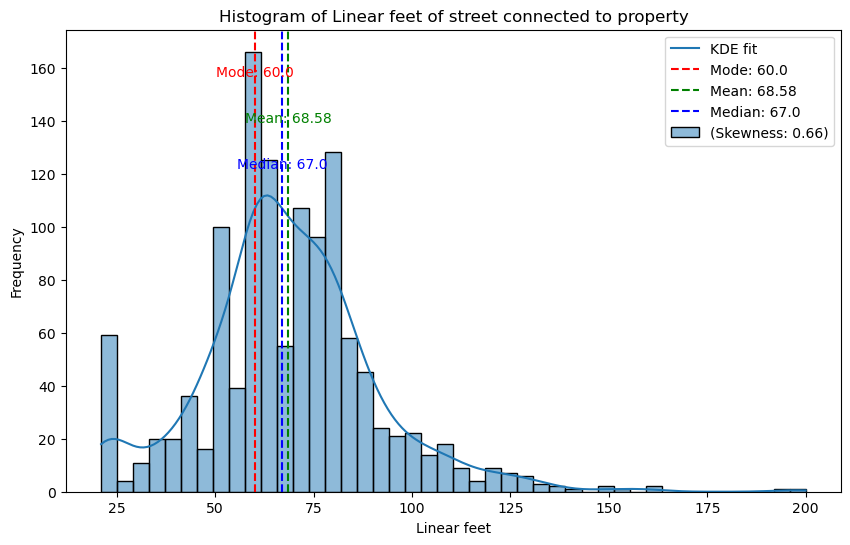

In [34]:
analyze_column(data_train, 'LotFrontage', xlabel='Linear feet',title= 'Linear feet of street connected to property')

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context Median is  best choice given the moderate positive skew. It ensures the imputed value is a robust measure of central tendency, not influenced by the skew.
</div>

In [35]:
# Calculate the median
median_value = data_train['LotFrontage'].median()

# Impute the missing value with the median
data_train['LotFrontage'].fillna(median_value, inplace=True)

In [36]:
data_train['LotFrontage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [37]:
numeric_nan_columns.remove('LotFrontage')
numeric_nan_columns

['BsmtFullBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageYrBlt',
 'MasVnrArea',
 'TotalBsmtSF',
 'BsmtFinSF2']

## Dealing with 'BsmtUnfSF' attribute 	

In [38]:
# 'BsmtUnfSF' attribute description
print(get_attribute_description('data_description.txt', 'BsmtUnfSF'))

BsmtUnfSF:
Unfinished square feet of basement area


In [39]:
data_train_BsmtUnfSF=data_train['BsmtUnfSF'].value_counts(dropna=False).reset_index()
data_train_BsmtUnfSF.sort_values('BsmtUnfSF')

,BsmtUnfSF,count
0,0.0,123
442,17.0,1
512,20.0,1
378,22.0,1
111,25.0,3
...,...,...
641,1958.0,1
452,1967.0,1
403,2062.0,1
498,2140.0,1


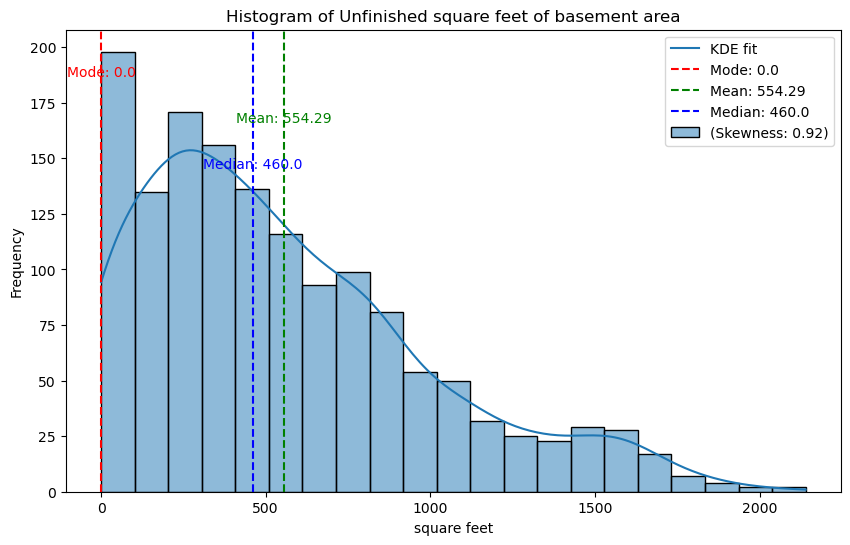

In [40]:
analyze_column(data_train, 'BsmtUnfSF', xlabel='square feet',title= 'Unfinished square feet of basement area')

In [41]:
data_train['BsmtUnfSF'].describe()

count    1458.000000
mean      554.294925
std       437.260486
min         0.000000
25%       219.250000
50%       460.000000
75%       797.750000
max      2140.000000
Name: BsmtUnfSF, dtype: float64

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context Median is  best choice given the positive skew 0.92. It ensures the imputed value is a robust measure of central tendency, not influenced by the skew.
</div>

In [42]:
# Calculate the median
median_value = data_train['BsmtUnfSF'].median()

# Impute the missing value with the median
data_train['BsmtUnfSF'].fillna(median_value, inplace=True)

In [43]:
data_train['BsmtUnfSF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: BsmtUnfSF
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [44]:
numeric_nan_columns.remove('BsmtUnfSF')
numeric_nan_columns

['BsmtFullBath',
 'GarageArea',
 'GarageYrBlt',
 'MasVnrArea',
 'TotalBsmtSF',
 'BsmtFinSF2']

## Dealing with 'MasVnrArea' attribute 	

In [45]:
# 'MasVnrArea' attribute description
print(get_attribute_description('data_description.txt', 'MasVnrArea'))

MasVnrArea:
Masonry veneer area in square feet


In [46]:
data_train_MasVnrArea=data_train['MasVnrArea'].value_counts(dropna=False).reset_index()
data_train_MasVnrArea.sort_values('MasVnrArea')

,MasVnrArea,count
0,0.0,877
127,1.0,1
226,3.0,1
63,14.0,3
22,16.0,4
...,...,...
295,1110.0,1
237,1159.0,1
93,1224.0,2
300,1290.0,1


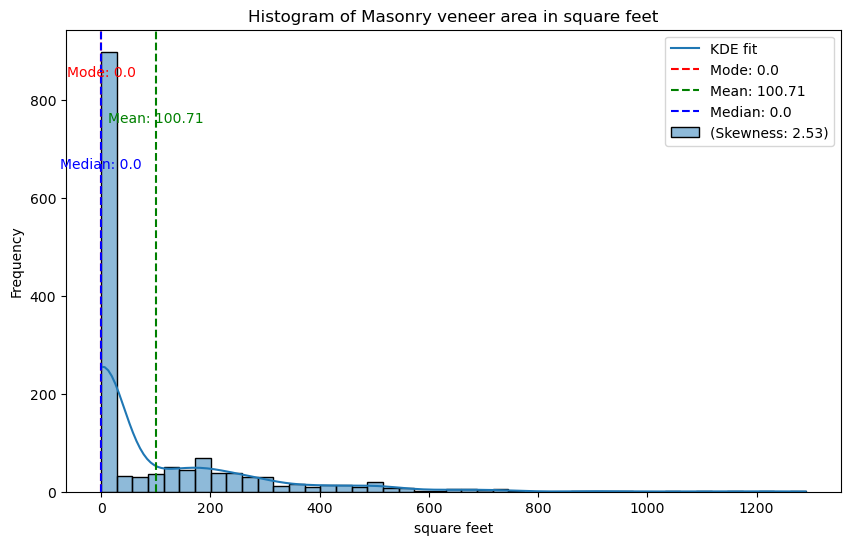

In [47]:
analyze_column(data_train, 'MasVnrArea', xlabel='square feet',title= 'Masonry veneer area in square feet')

In [48]:
data_train['MasVnrArea'].describe()

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context, the Mode can be a choice for imputation. 
</div>

In [49]:
# Calculate the mode
mode_value = data_train['MasVnrArea'].mode()[0]

# Impute the missing value with the mode
data_train['MasVnrArea'].fillna(mode_value, inplace=True)

In [50]:
data_train['MasVnrArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [51]:
numeric_nan_columns.remove('MasVnrArea')
numeric_nan_columns

['BsmtFullBath', 'GarageArea', 'GarageYrBlt', 'TotalBsmtSF', 'BsmtFinSF2']

## Dealing with 'GarageYrBlt' attribute 	

In [52]:
# 'GarageYrBlt' attribute description
print(get_attribute_description('data_description.txt', 'GarageYrBlt'))

data_train_MasVnrArea=data_train['GarageYrBlt'].value_counts(dropna=False).reset_index()
data_train_MasVnrArea.sort_values('GarageYrBlt')

GarageYrBlt:
Year garage was built


,GarageYrBlt,count
94,1895.0,1
90,1896.0,1
74,1900.0,5
63,1910.0,7
73,1915.0,5
...,...,...
6,2008.0,32
60,2009.0,8
86,2010.0,2
92,2207.0,1


Text(0.5, 0, 'Year')

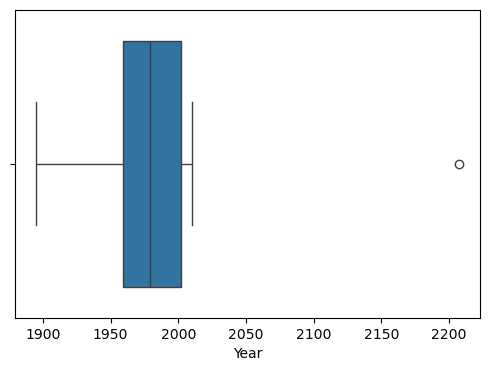

In [53]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_train['GarageYrBlt'].dropna())
plt.xlabel('Year')

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
The house with the Id of 92, the Year garage was built is 2207. This data is clearly an outlier and not compatible with the context. So this value should be replaced too.
 
</div>

In [54]:
# replacing the data 2207 with NaN
data_train['GarageYrBlt'].replace(2207, np.nan, inplace=True)

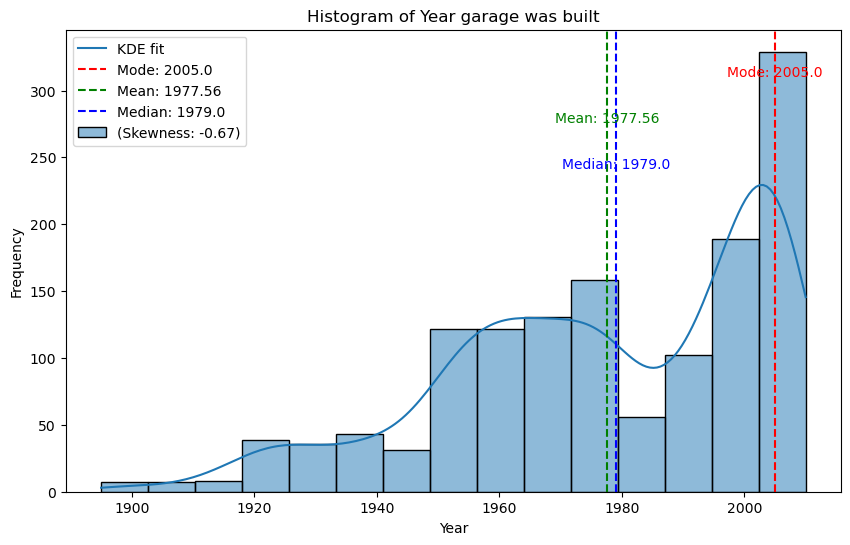

In [55]:
analyze_column(data_train, 'GarageYrBlt', xlabel='Year',title= 'Year garage was built')

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context, the Median can be a choice for imputation.
 
</div>

In [56]:
data_train['GarageYrBlt'].describe()

count    1380.000000
mean     1977.555072
std        25.709241
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [57]:
# Calculate the mode
median_value = data_train['GarageYrBlt'].median()

# Impute the missing value with the mode
data_train['GarageYrBlt'].fillna(median_value, inplace=True)

In [58]:
data_train['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [59]:
numeric_nan_columns.remove('GarageYrBlt')
numeric_nan_columns

['BsmtFullBath', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF2']

## Dealing with 'GarageArea' attribute

In [60]:
# 'GarageYrBlt' attribute description
attribute_name = 'GarageArea'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_MasVnrArea=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_MasVnrArea.sort_values(attribute_name)

GarageArea:
Size of garage in square feet


,GarageArea,count
0,0.0,76
298,100.0,1
428,160.0,1
222,162.0,2
401,164.0,1
...,...,...
368,1231.0,1
443,1314.0,1
407,1348.0,1
458,1488.0,1


Text(0.5, 0, 'square feet')

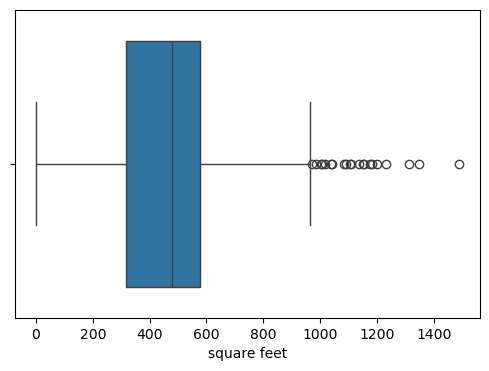

In [61]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_train[attribute_name].dropna())
plt.xlabel('square feet')

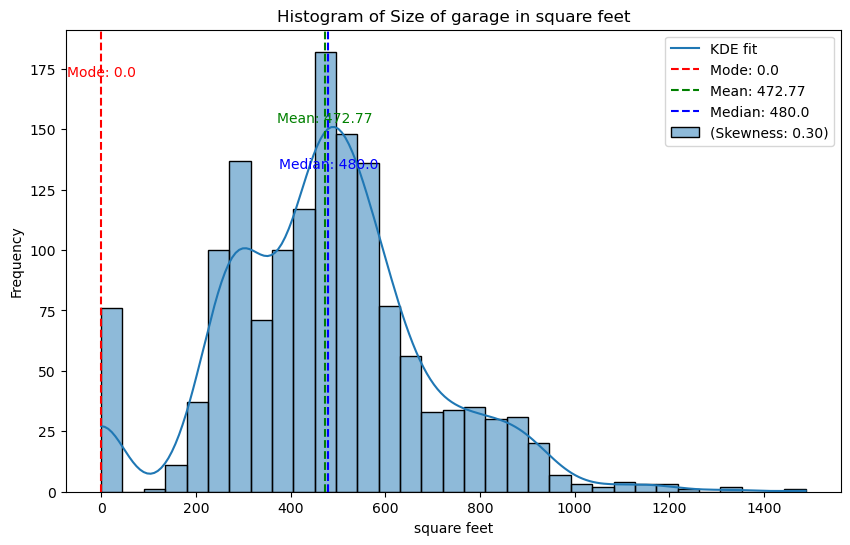

In [62]:
analyze_column(data_train, attribute_name, xlabel='square feet',title= 'Size of garage in square feet')

In [63]:
data_train[attribute_name].describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context, the Median can be a choice for imputation.
 
</div>

In [64]:
# Calculate the mode
median_value = data_train['GarageArea'].median()

# Impute the missing value with the mode
data_train['GarageArea'].fillna(median_value, inplace=True)

# Checking the attribute after imputing the misssing value
data_train['GarageArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: GarageArea
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [65]:
numeric_nan_columns.remove('GarageArea')
numeric_nan_columns

['BsmtFullBath', 'TotalBsmtSF', 'BsmtFinSF2']

## Dealing with 'BsmtFullBath' attribute

In [77]:
# 'BsmtFullBath' attribute description
attribute_name = 'BsmtFullBath'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_BsmtFullBath=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_BsmtFullBath.sort_values(attribute_name)

BsmtFullBath:
Basement full bathrooms


,BsmtFullBath,count
0,0.0,851
1,1.0,584
2,2.0,23
3,3.0,1


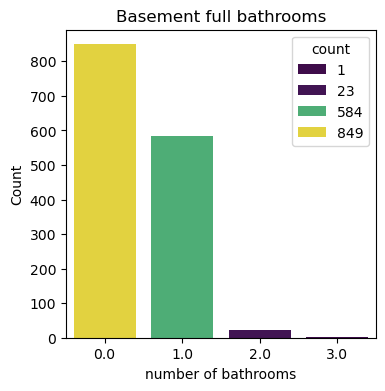

In [72]:
plt.figure(figsize=(4, 4))
sns.barplot(x='BsmtFullBath', y='count',hue='count',data=data_train_BsmtFullBath.dropna(), palette='viridis')
plt.xlabel("number of bathrooms")
plt.ylabel("Count")
plt.title("Basement full bathrooms")
plt.show()

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
Given that the data is discrete and theere are only two missing values, The most frequent value '0.0' is the suitable replacement.
</div>

In [74]:
data_train['BsmtFullBath'].mode()[0]

0.0

In [75]:
# Calculate the mode
mode_value = data_train['BsmtFullBath'].mode()[0]

# Impute the missing value with the mode
data_train['BsmtFullBath'].fillna(mode_value, inplace=True)

# Checking the attribute after imputing the misssing value
data_train['BsmtFullBath'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: BsmtFullBath
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [76]:
numeric_nan_columns.remove('BsmtFullBath')
numeric_nan_columns

['TotalBsmtSF', 'BsmtFinSF2']

## Dealing with 'TotalBsmtSF' attribute

In [78]:
# 'TotalBsmtSF' attribute description
attribute_name = 'TotalBsmtSF'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_BsmtFullBath=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_BsmtFullBath.sort_values(attribute_name)

TotalBsmtSF:
Total square feet of basement area


,TotalBsmtSF,count
0,0.0,41
550,160.0,1
665,173.0,1
710,192.0,1
261,216.0,2
...,...,...
600,2630.0,1
495,2660.0,1
580,2846.0,1
475,5095.0,1


Text(0.5, 0, 'square feet')

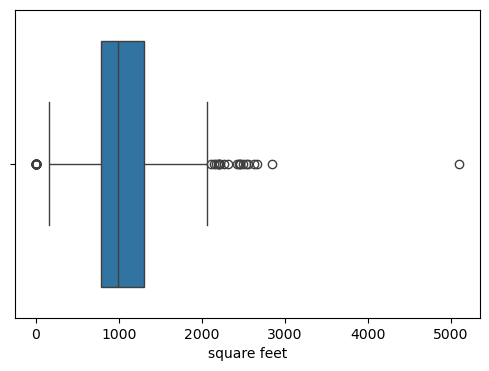

In [79]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_train[attribute_name].dropna())
plt.xlabel('square feet')

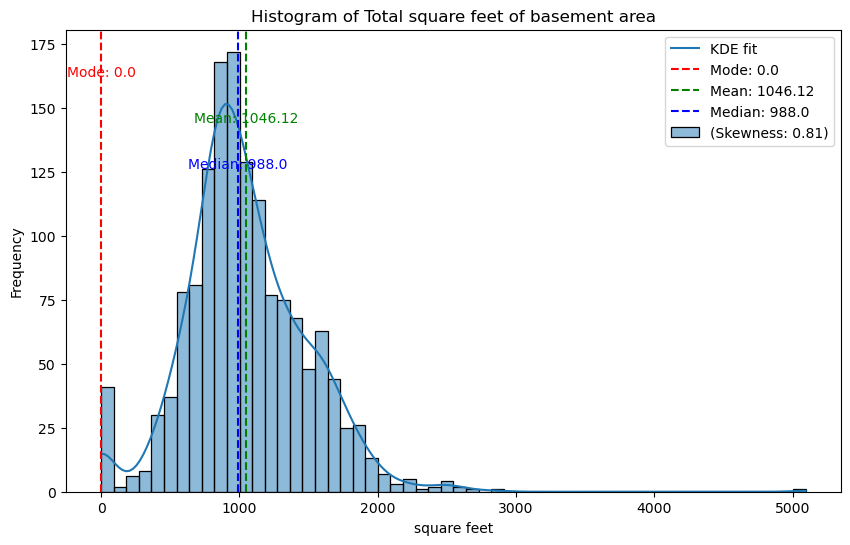

In [83]:
analyze_column(data_train, attribute_name, xlabel='square feet',title= 'Total square feet of basement area')

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context, the Median can be a choice for imputation.
 
</div>

In [87]:
median_value = data_train[attribute_name].median()

# Impute the missing value with the mode
data_train[attribute_name].fillna(median_value, inplace=True)

# Checking the attribute after imputing the misssing value
data_train[attribute_name].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: TotalBsmtSF
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [88]:
numeric_nan_columns.remove(attribute_name)
numeric_nan_columns

['BsmtFinSF2']

## Dealing with 'BsmtFinSF2' attribute

In [99]:
# 'TotalBsmtSF' attribute description
attribute_name = 'BsmtFinSF2'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_BsmtFinSF2=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_BsmtFinSF2.sort_values(attribute_name)

BsmtFinSF2:
Type 2 finished square feet


,BsmtFinSF2,count
0,0.0,1279
32,6.0,1
118,12.0,1
47,38.0,1
88,40.0,1
...,...,...
116,1073.0,1
65,1083.0,1
64,1164.0,1
69,1393.0,1


Text(0.5, 0, 'square feet')

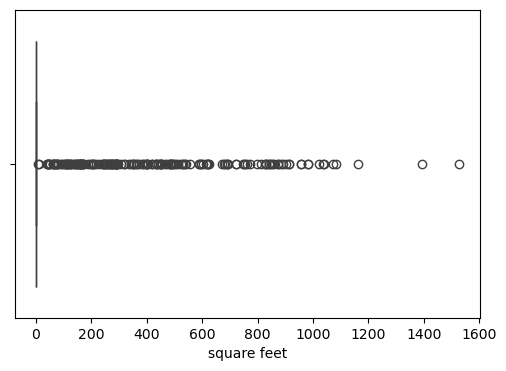

In [90]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_train[attribute_name].dropna())
plt.xlabel('square feet')

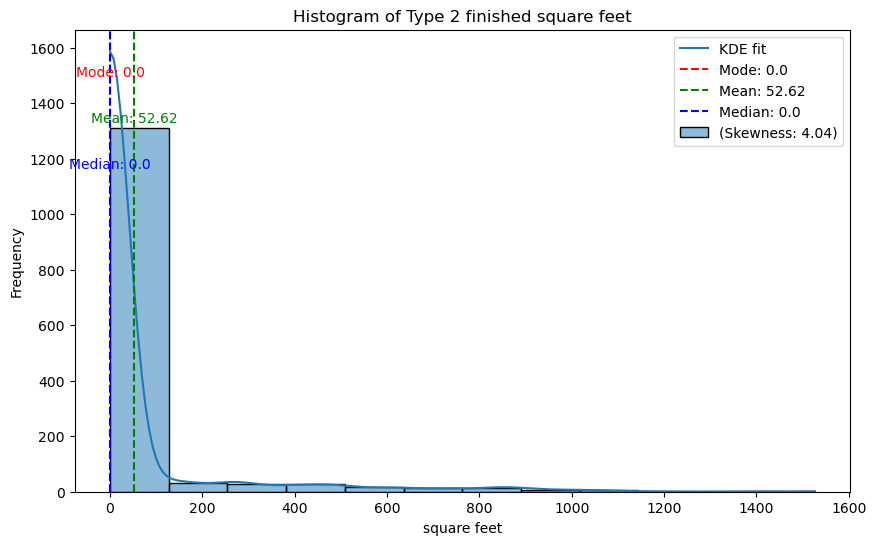

In [91]:
analyze_column(data_train, attribute_name, xlabel='square feet',title= 'Type 2 finished square feet')

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
Given the high frequency of the value '0.0' and there is only one missing value, the value of '0.0' is the proper choice for replacement.
 
</div>

In [92]:
mode_value = data_train[attribute_name].mode()[0]

# Impute the missing value with the mode
data_train[attribute_name].fillna(mode_value, inplace=True)

# Checking the attribute after imputing the misssing value
data_train[attribute_name].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: BsmtFinSF2
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [93]:
numeric_nan_columns.remove(attribute_name)
numeric_nan_columns

[]

<div style="background-color: lightgreen; padding: 12px; border-radius: 5px;">

<b>Next Step<b>

All the missing values of the attributes having the numeric values are replaced.

next step is to Dealing with missing values of the attributes having the non-numeric values.
</div>

In [95]:
non_numeric_nan_columns = list(set(nan_columns) & set(object_columns))
print(non_numeric_nan_columns,'\n')

['Fence', 'KitchenQual', 'SaleType', 'BsmtFinType1', 'MiscFeature', 'Exterior1st', 'GarageFinish', 'BsmtExposure', 'GarageQual', 'Functional', 'FireplaceQu', 'MasVnrType', 'GarageCond', 'PoolQC', 'BsmtCond', 'Exterior2nd', 'Alley', 'BsmtFinType2', 'MSZoning', 'BsmtQual', 'Utilities', 'GarageType'] 



In [102]:
#attribute description
attribute_name = 'Fence'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_attribute=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_attribute

Fence:
Fence quality
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence


,Fence,count
0,NaN,1169
1,MnPrv,172
2,GdPrv,59
3,GdWo,58
4,MnWw,1


In [101]:
#attribute description
attribute_name = 'KitchenQual'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_attribute=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_attribute

KitchenQual:
Kitchen quality
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor


,KitchenQual,count
0,TA,757
1,Gd,565
2,Ex,105
3,Fa,31
4,NaN,1


In [103]:
#attribute description
attribute_name = 'SaleType'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_attribute=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_attribute

SaleType:
Type of sale
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other


,SaleType,count
0,WD,1258
1,New,117
2,COD,44
3,ConLD,17
4,CWD,8
5,Oth,4
6,ConLI,4
7,Con,3
8,ConLw,3
9,NaN,1


# Exploratory Data Analysis (EDA)
Objectives:
* Exploratory Data Analysis with SQL
* Exploratory Data Analysis with Data Visualization
* Preparing Data Feature Engineering

g

# Interactive Visual Analytics
Objectives:
* Intreactive visual analytics using Folium, Plotly Dash, etc.

# Predictive Analysis

Objectives:
* Standardize the data
* Split into training data and test data
* Finding best Hyperparameter for different models such as SVM, Classification Trees, Logistic Regression and etc.
* Find the method performs best using test data

# Results and Discusion

# Conclusion